<style type="text/css">
    ol { list-style-type: upper-alpha; }
</style>

<center> <img src=https://i.imgur.com/0TSSaqL.png width="550"> </center>

<center><b>Módulo 3 - Unidad 1 </b></center>
<center><b>Limpieza y Manipulación de Datos</b></center>
<center><b>Caso Práctico</b></center>
<center><b>Adriana Vargas</b></center>

## Objetivo

El objetivo es realizar una limpieza y ajuste de los datos proporcionados, y generar una estructura de datos que sea fácilmente consultable por el equipo de data scientists para generar sus modelos.

Se incluyen también elementos iniciales de exploración de la estructura de datos unificada final para proporcionar una primera intuición del dataset.

## Fases

**1. Data Cleaning**

En esta fase cargan en dataframes diferentes cada uno de los datasets proporcionados, y se realizan las siguientes actividades por cada uno:

1. Explorar los datos del dataset
2. Análisis de duplicados
3. Gestionar valores nulos
4. Ajustar tipos de datos

**2. Unificar el dataset final**

En esta fase se unifican los 2 datasets de Sellout, con Sellin, para finalmente hacer un merge con el maestro de productos, y el maestro de clientes.

**3. Explorar el dataset final**

En esta fase se ordena el dataset final, y se realizan algunas consultas de exploración.

## **Datasets**

Los datasets proporcionados son los siguientes, y contienen las siguente información en sus columnas.

* **Catálogo de Clientes**

Un maestro o catálogo de clientes (maestro_clientes_prueba): contiene toda la información disponible sobre las tiendas y distribuidores que venden los productos del cliente.

**Origen:**
* maestro_clientes.csv

**Columnas:**
1. **NUM TDA:** Número de tienda.
2. **NOMBRE DE TDA:** Nombre de la tienda.
3. **CADENA:** Proveedor.
4. **FORMATO:** Formato de tienda (shop, small, great).
5. **MUNICIPIO/CIUDAD:** Ubicación de la tienda.
6. **ESTADO:** Estado en el que se encuentra la tienda.
7. **DIVISION:** Región en la que se encuentra la tienda.
8. **DEPOSITO / DISTRIBUIDOR:** Distribuidor de la tienda.
9. **ESTRUCTURA:** Tipo de estructura.
10. **GRADO:** Grado.

* **Catálogo de Productos**

Un maestro o catálogo de productos (maestro_productos_prueba.csv): contiene toda la información disponible relativa a los productos que vende el cliente y competidores.

**Origen:**
* maestro_productos.csv

**Columnas:**
1. **Sku:** Stock Keeping Unit, código de producto, referencia en inventario.
2. **Sku_Description:** Stock Keeping Unit, descripción de producto.
3. **Sku_Category:**	Categoría de producto.	
4. **Sku_Subcategory:** Subcategoría de producto.

* **Ventas Sellout**

Archivos de venta de sellout para dos proveedores diferentes (selloutproveedor1. csv y sellout-proveedor2.csv): contiene histórico de
ventas y precio de sellout (del retailer a consumidor final) para cada producto y cada tienda.

**Origen:**
* sellout-proveedor1.csv
* sellout-proveedor2.csv

**Columnas:**
1. **Sku:** Id del producto.
2. **Date:** Fecha de venta.
3. **Store_Id:** Tienda en la que se realizó la venta.
4. **Units:** Número de unidades de producto vendido.
6. **Price:** Precio por unidad.

* **Ventas Sellin**

Archivo de venta de sellin (sellin.csv): contiene el histórico de ventas y precio de sellin (del fabricante al retailer) para cada producto y tienda.

**Origen:**
* sellin-total.csv

**Columnas:**
1. **Sku:** Id del producto.
2. **Date:** Fecha de venta.
3. **Store_Id:** Tienda en la que se realizó la venta.
4. **Pieces:** Número de unidades de producto vendido.
5. **Price:** Precio por unidad.
6. **Margin:** Margen de ganancia.


## **Data Cleaning: Catálogo de Clientes**

### **1. Explorar los datos del dataset**

Exploramos los datos, obtenemos número de filas y columnas, y tipos de datos de cada columna.

In [ ]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

df_clientes = pd.read_csv('maestro_clientes.csv', sep=',', index_col=0)
df_clientes.head()                 

,NOMBRE DE TDA,CADENA,FORMATO,MUNICIPIO/CIUDAD,ESTADO,DIVISION,DEPOSITO / DISTRIBUIDOR,ESTRUCTURA,GRADO
NUM TDA,,,,,,,,,
2,Bloody Sea Green BookShop,proveedor_1,Shop,Bizarre White Shop,Coalmar,SURESTE,Mogulval Corp.,DISTRIBUIDORES,VI
4,Funny Sky Blue GipsyTrade,proveedor_1,Shop,Bizarre White Shop,Coalmar,SURESTE,Mogulval Corp.,DISTRIBUIDORES,VI
5,Rare Green Laundrette,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI
6,Angry Indigo Center,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI
7,Tall Violet Deli,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI


In [ ]:
df_clientes.shape

(2452, 9)

In [ ]:
df_clientes.dtypes

NOMBRE DE TDA              object
CADENA                     object
FORMATO                    object
MUNICIPIO/CIUDAD           object
ESTADO                     object
DIVISION                   object
DEPOSITO / DISTRIBUIDOR    object
ESTRUCTURA                 object
GRADO                      object
dtype: object

Ajustamos los nombres de las columnas por convención.

In [ ]:
df_clientes = df_clientes.rename(columns={"NOMBRE DE TDA": "Store_Name","CADENA":"Provider","FORMATO":"Store_Type",
                                          "MUNICIPIO/CIUDAD":"Store_Location","ESTADO":"Store_State","DIVISION":"Store_Division",
                                          "DEPOSITO / DISTRIBUIDOR":"Store_Warehouse","ESTRUCTURA":"Store_Structure","GRADO":"Store_Level"})
df_clientes.head()

,Store_Name,Provider,Store_Type,Store_Location,Store_State,Store_Division,Store_Warehouse,Store_Structure,Store_Level
NUM TDA,,,,,,,,,
2,Bloody Sea Green BookShop,proveedor_1,Shop,Bizarre White Shop,Coalmar,SURESTE,Mogulval Corp.,DISTRIBUIDORES,VI
4,Funny Sky Blue GipsyTrade,proveedor_1,Shop,Bizarre White Shop,Coalmar,SURESTE,Mogulval Corp.,DISTRIBUIDORES,VI
5,Rare Green Laundrette,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI
6,Angry Indigo Center,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI
7,Tall Violet Deli,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI


### **2. Análisis de duplicados**

Identificamos cuántos registros duplicados existen y decidimos cómo gestionarlos.

In [ ]:
df_clientes.duplicated(keep='first').sum()

1

Encontramos 1 registro duplicado en clientes:

In [ ]:
duplicated = df_clientes[df_clientes.duplicated(keep='first') == True]
duplicated

,Store_Name,Provider,Store_Type,Store_Location,Store_State,Store_Division,Store_Warehouse,Store_Structure,Store_Level
NUM TDA,,,,,,,,,
2762,Olive Center,proveedor_2,Grocery,Angry Azure Waters,Barthovit,NORESTE,Barrusgul Corp.,FORANEO,II


Comprobamos que el registro duplicado encontrado 2762, está duplicado con el registro 1447:

In [ ]:
duplicated = df_clientes[df_clientes.duplicated(subset=['Store_Name','Provider','Store_Type',
                                  'Store_Location','Store_State','Store_Division',
                                  'Store_Warehouse','Store_Structure','Store_Level'], keep=False)]
duplicated

,Store_Name,Provider,Store_Type,Store_Location,Store_State,Store_Division,Store_Warehouse,Store_Structure,Store_Level
NUM TDA,,,,,,,,,
1447,Olive Center,proveedor_2,Grocery,Angry Azure Waters,Barthovit,NORESTE,Barrusgul Corp.,FORANEO,II
2762,Olive Center,proveedor_2,Grocery,Angry Azure Waters,Barthovit,NORESTE,Barrusgul Corp.,FORANEO,II


Borramos el registro duplicado:

In [ ]:
df_clientes = df_clientes.drop_duplicates(keep='first')
df_clientes.duplicated(keep='first').sum()

0

Comprobamos que el registro 2762 fue eliminado.

In [ ]:
df_clientes[df_clientes.index == 2762]

,Store_Name,Provider,Store_Type,Store_Location,Store_State,Store_Division,Store_Warehouse,Store_Structure,Store_Level
NUM TDA,,,,,,,,,


Y conservamos el registro original 1447.

In [ ]:
df_clientes[df_clientes.index == 1447]

,Store_Name,Provider,Store_Type,Store_Location,Store_State,Store_Division,Store_Warehouse,Store_Structure,Store_Level
NUM TDA,,,,,,,,,
1447,Olive Center,proveedor_2,Grocery,Angry Azure Waters,Barthovit,NORESTE,Barrusgul Corp.,FORANEO,II


### **3. Gestionar valores nulos**

Identificamos valores nulos en el dataset de clientes.

Para el caso del catálogo de clientes, no tenemos valores nulos.

In [ ]:
df_clientes.isnull().sum()

Store_Name         0
Provider           0
Store_Type         0
Store_Location     0
Store_State        0
Store_Division     0
Store_Warehouse    0
Store_Structure    0
Store_Level        0
dtype: int64

### **4. Ajustar tipos de datos**

Todas las columnas del dataset de clientes son valores string.

In [ ]:
df_clientes = df_clientes.astype({'Store_Name':'string','Provider':'string','Store_Type':'string',
                                  'Store_Location':'string','Store_State':'string','Store_Division':'string',
                                  'Store_Warehouse':'string','Store_Structure':'string','Store_Level':'string'})
df_clientes.dtypes

Store_Name         string
Provider           string
Store_Type         string
Store_Location     string
Store_State        string
Store_Division     string
Store_Warehouse    string
Store_Structure    string
Store_Level        string
dtype: object

## **Data Cleaning: Catálogo de Productos**

### **1. Explorar los datos del dataset**

Exploramos los datos, obtenemos número de filas y columnas, y tipos de datos de cada columna.

In [ ]:
df_productos = pd.read_csv('maestro_productos.csv', sep=',', index_col=0)
df_productos.head()

,Sku_Description,Sku_Category,Sku_Subcategory
Sku,,,
11058,Frosted Mango,Sugar-free,Cereal bars
29207,Nut Cheerios Mango,Super-flavour,Cereal box
38379,MultiGrain Mango,Sugar-free,Cereal bars
42671,Crunch Mango,Sugar-free,Cereal bars
54644,Corn Mango,Sugar-free,Cereal bars


In [ ]:
df_productos.shape

(1242, 3)

In [ ]:
df_productos.dtypes

Sku_Description    object
Sku_Category       object
Sku_Subcategory    object
dtype: object

### **2. Análisis de duplicados**

No se identificaron registros duplicados en el catálogo de productos.

In [ ]:
df_productos.duplicated(keep='first').sum()

0

### **3. Gestionar valores nulos**

Identificamos valores nulos en el dataset de productos.

Para el caso del catálogo de productos, no tenemos valores nulos.

In [ ]:
df_productos.isnull().sum()

Sku_Description    0
Sku_Category       0
Sku_Subcategory    0
dtype: int64

### **4. Ajustar tipos de datos**

Todas las columnas del dataset de productos son valores string.

In [ ]:
df_productos = df_productos.astype({'Sku_Description':'string','Sku_Category':'string','Sku_Subcategory':'string'})
df_productos.dtypes

Sku_Description    string
Sku_Category       string
Sku_Subcategory    string
dtype: object

## **Data Cleaning: Ventas SELLOUT**

### **1. Explorar los datos del dataset**

Exploramos los datos, obtenemos número de filas y columnas, y tipos de datos de cada columna.

Cargamos dataset 1, con una columna index iniciando en 1.

Y agregamos las siguientes columnas extra:
1. Type con posibles valores sellout / sellin, para estar preparados en el momento en el que unifiquemos los registros de ventas.
2. Margin, que aplica solo a sellin, pero que nos servirá para estar preparados más adelante cuando unifiquemos los registros de ventas.
3. Total, para obtener el monto total de la venta, multiplicando precio por número de unidades.

In [ ]:
from numpy import NaN

df_sellout_1 = pd.read_csv('sellout-proveedor1.csv',sep=',')
df_sellout_1.index = df_sellout_1.index + 1

df_sellout_1.insert(0,'Type','sellout')
df_sellout_1['Margin'] = NaN

df_sellout_1 = df_sellout_1.astype({'Units':'float','Price':'float'})
df_sellout_1['Total'] = df_sellout_1['Units'] * df_sellout_1['Price']

df_sellout_1.head()

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total
1,sellout,4220015,2017-01-01 SO Diaria Piezas,18,6.0,15.6,NaN,93.6
2,sellout,4220015,2017-01-01 SO Diaria Piezas,24,0.0,0.0,NaN,0.0
3,sellout,4220015,2017-01-01 SO Diaria Piezas,39,0.0,0.0,NaN,0.0
4,sellout,4220015,2017-01-01 SO Diaria Piezas,44,0.0,0.0,NaN,0.0
5,sellout,4220015,2017-01-01 SO Diaria Piezas,46,0.0,0.0,NaN,0.0


In [ ]:
df_sellout_1.tail()

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total
1206361,sellout,4829827,2017-06-04 SO Diaria Piezas,705,0.00,0.0,NaN,0.0
1206362,sellout,4829827,2017-06-04 SO Diaria Piezas,706,0.00,0.0,NaN,0.0
1206363,sellout,4829827,2017-06-04 SO Diaria Piezas,707,0.75,27.2,NaN,20.4
1206364,sellout,4829827,2017-06-04 SO Diaria Piezas,708,0.00,0.0,NaN,0.0
1206365,sellout,4829827,2017-06-04 SO Diaria Piezas,709,0.00,0.0,NaN,0.0


Cargamos el dataset 2, con una columna index iniciando en el siguiente valor a la longitud del dataframe sellout_1, para continuar la secuencia del dataset 1.

También renombramos la columna Pieces a Units para unificar los 2 datasets.

Agregamos las columnas extra para Type y Margin.

Y la columna Total, para obtener el monto total de la venta, multiplicando precio por número de unidades.
Antes de esto es necesario garantizar que Units y Price son float, por lo que es necesario remover el signo $ de Price.

In [ ]:
df_sellout_2 = pd.read_csv('sellout-proveedor2.csv',sep=',')
df_sellout_2.index = df_sellout_2.index + len(df_sellout_1.index) + 1

df_sellout_2 = df_sellout_2.rename(columns={"Pieces": "Units"})
df_sellout_2['Price'] = df_sellout_2['Price'].str.replace('\$', '')
df_sellout_2 = df_sellout_2.astype({'Units':'float','Price':'float'})

df_sellout_2.insert(0,'Type','sellout')
df_sellout_2['Margin'] = NaN
df_sellout_2['Total'] = df_sellout_2['Units'] * df_sellout_2['Price']

df_sellout_2.head()

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total
1206366,sellout,4240039,2016/01/01,1000,23.0,16.0,NaN,368.0
1206367,sellout,4240039,2016/01/01,1001,116.0,16.0,NaN,1856.0
1206368,sellout,4240039,2016/01/01,1002,146.0,16.0,NaN,2336.0
1206369,sellout,4240039,2016/01/01,1003,17.0,16.8,NaN,285.6
1206370,sellout,4240039,2016/01/01,1004,5.0,16.7,NaN,83.5


In [ ]:
df_sellout_2.tail()

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total
6068390,sellout,4729193,2016/12/30,5827,14.0,17.90,NaN,250.60
6068391,sellout,4729193,2016/12/30,5850,3.0,17.90,NaN,53.70
6068392,sellout,4729193,2016/12/30,5851,3.0,16.00,NaN,48.00
6068393,sellout,4729193,2016/12/30,5855,21.0,16.86,NaN,354.06
6068394,sellout,4729193,2016/08/20,3766,12.0,13.60,NaN,163.20


In [ ]:
df_sellout_1.shape

(1206365, 8)

In [ ]:
df_sellout_1.dtypes

Type         object
Sku           int64
Date         object
Store_Id      int64
Units       float64
Price       float64
Margin      float64
Total       float64
dtype: object

In [ ]:
df_sellout_2.shape

(4862029, 8)

In [ ]:
df_sellout_2.dtypes

Type         object
Sku           int64
Date         object
Store_Id      int64
Units       float64
Price       float64
Margin      float64
Total       float64
dtype: object

### **2. Análisis de duplicados**

Identificamos cuántos registros duplicados existen y decidimos cómo gestionarlos.

In [ ]:
df_sellout_1.duplicated(keep='first').sum()

0

No encontramos registros marcados como duplicados en el dataset de Sellout 1.

Ahora revisamos el dataset de Sellout 2.

In [ ]:
df_sellout_2.duplicated(keep='first').sum()

3

Encontramos 3 registros marcados como duplicados de ventas sellout del proveedor 2, pero se tratan de registros de ventas del mismo producto pero en 3 tiendas diferentes, por lo que no son duplicados que deban eliminarse.

In [ ]:
duplicated = df_sellout_2[df_sellout_2.duplicated(keep='first') == True]
duplicated

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total
6022566,sellout,4709131,2016/08/08,1902,2.0,13.5,NaN,27.0
6022601,sellout,4709131,2016/08/08,2375,3.0,13.5,NaN,40.5
6027348,sellout,4709131,2016/08/17,3790,2.0,14.2,NaN,28.4


### **3. Gestionar valores nulos**

Identificamos valores nulos en el dataset de sellout unificado para proveedor 1 y 2.

No tenemos valores nulos en este dataset de ventas Sellout para ninguno de los proveedores, solo en Margin que fue una columna agregada para unificar más adelante los registros de ventas Sellout y Sellin.

In [ ]:
df_sellout_1.isnull().sum()

Type              0
Sku               0
Date              0
Store_Id          0
Units             0
Price             0
Margin      1206365
Total             0
dtype: int64

In [ ]:
df_sellout_2.isnull().sum()

Type              0
Sku               0
Date              0
Store_Id          0
Units             0
Price             0
Margin      4862029
Total             0
dtype: int64

### **4. Ajustar tipos de datos**

La columna Date debe ser tipo date.

Debemos concatenar los 2 datasets de ventas sellout, pero antes de hacerlo es necesario unificar el formato del campo Date.

Primero vamos a remover la cadena ' SO Diaria Piezas' presente en la columna Date del dataset 1.

In [ ]:
df_sellout_1['Date'] = df_sellout_1['Date'].str.replace(' SO Diaria Piezas','')
df_sellout_1.head()

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total
1,sellout,4220015,2017-01-01,18,6.0,15.6,NaN,93.6
2,sellout,4220015,2017-01-01,24,0.0,0.0,NaN,0.0
3,sellout,4220015,2017-01-01,39,0.0,0.0,NaN,0.0
4,sellout,4220015,2017-01-01,44,0.0,0.0,NaN,0.0
5,sellout,4220015,2017-01-01,46,0.0,0.0,NaN,0.0


Ahora en el dataset 2 vamos a reemplazar:
* '/' en la columna Date por '-' para unificar el formato de fecha antes de la conversión a datetime

In [ ]:
df_sellout_2['Date'] = df_sellout_2['Date'].str.replace('/', '-')

df_sellout_2.head()

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total
1206366,sellout,4240039,2016-01-01,1000,23.0,16.0,NaN,368.0
1206367,sellout,4240039,2016-01-01,1001,116.0,16.0,NaN,1856.0
1206368,sellout,4240039,2016-01-01,1002,146.0,16.0,NaN,2336.0
1206369,sellout,4240039,2016-01-01,1003,17.0,16.8,NaN,285.6
1206370,sellout,4240039,2016-01-01,1004,5.0,16.7,NaN,83.5


Ahora vamos a ajustar los tipos de datos de todas las columnas, para los 2 datasets.

In [ ]:
df_sellout_1 = df_sellout_1.astype({'Type':'string',"Sku":"int","Store_Id":"int"})
df_sellout_1['Date'] = pd.to_datetime(df_sellout_1['Date'])

df_sellout_1.dtypes

Type                string
Sku                  int64
Date        datetime64[ns]
Store_Id             int64
Units              float64
Price              float64
Margin             float64
Total              float64
dtype: object

In [ ]:
df_sellout_2 = df_sellout_2.astype({'Type':'string','Sku':'int','Store_Id':'int'})
df_sellout_2['Date'] = pd.to_datetime(df_sellout_2['Date'])

df_sellout_2.dtypes

Type                string
Sku                  int64
Date        datetime64[ns]
Store_Id             int64
Units              float64
Price              float64
Margin             float64
Total              float64
dtype: object

### **5. Concatenar datasets de ventas Sellout**

Por último, una vez ajustados cada dataset, sin duplicados, ni registros considerados nulos, ahora concatenamos los 2 datasets de ventas sellout.

* Tamaño dataset 1: 1.206.365
* Tamaño dataset 2: 4.862.029
* Tamaño dataset concatenado: 6.068.394

In [ ]:
df_sellout_1.shape

(1206365, 8)

In [ ]:
df_sellout_2.shape

(4862029, 8)

In [ ]:
datasets = [df_sellout_1, df_sellout_2]
df_sellout = pd.concat(datasets)
df_sellout.head()

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total
1,sellout,4220015,2017-01-01,18,6.0,15.6,NaN,93.6
2,sellout,4220015,2017-01-01,24,0.0,0.0,NaN,0.0
3,sellout,4220015,2017-01-01,39,0.0,0.0,NaN,0.0
4,sellout,4220015,2017-01-01,44,0.0,0.0,NaN,0.0
5,sellout,4220015,2017-01-01,46,0.0,0.0,NaN,0.0


In [ ]:
df_sellout.tail()

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total
6068390,sellout,4729193,2016-12-30,5827,14.0,17.90,NaN,250.60
6068391,sellout,4729193,2016-12-30,5850,3.0,17.90,NaN,53.70
6068392,sellout,4729193,2016-12-30,5851,3.0,16.00,NaN,48.00
6068393,sellout,4729193,2016-12-30,5855,21.0,16.86,NaN,354.06
6068394,sellout,4729193,2016-08-20,3766,12.0,13.60,NaN,163.20


In [ ]:
df_sellout.shape

(6068394, 8)

In [ ]:
df_sellout.dtypes

Type                string
Sku                  int64
Date        datetime64[ns]
Store_Id             int64
Units              float64
Price              float64
Margin             float64
Total              float64
dtype: object

## **Data Cleaning: Ventas SELLIN**

### **1. Explorar los datos del dataset**

Exploramos los datos, obtenemos número de filas y columnas, y tipos de datos de cada columna.

Cargamos el dataset sellin, con una columna index iniciando en el siguiente registro de acuerdo a la longitud del dataframe sellout, para continuar la secuencia del dataset de sellout ya unificado.

Y agregamos la columna Type, con el valor sellin.

También renombramos la columna Pieces a Units para unificar.

In [ ]:
df_sellin = pd.read_csv('sellin-total.csv',sep=',')
df_sellin.index = df_sellin.index + len(df_sellout.index) + 1

df_sellin.insert(0,'Type','sellin')
df_sellin = df_sellin.rename(columns={"Pieces": "Units"})

df_sellin = df_sellin.astype({'Units':'float','Price':'float'})
df_sellin['Total'] = df_sellin['Units'] * df_sellin['Price']

df_sellin.head()

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total
6068395,sellin,4220015,02/01/2015,100,20.0,13.01,9.78,260.2
6068396,sellin,4220015,02/01/2015,116,20.0,13.01,9.78,260.2
6068397,sellin,4220015,02/01/2015,141,80.0,13.01,9.78,1040.8
6068398,sellin,4220015,02/01/2015,146,10.0,13.01,9.78,130.1
6068399,sellin,4220015,02/01/2015,151,20.0,13.09,9.87,261.8


In [ ]:
df_sellin.shape

(4188783, 8)

In [ ]:
df_sellin.dtypes

Type         object
Sku           int64
Date         object
Store_Id      int64
Units       float64
Price       float64
Margin      float64
Total       float64
dtype: object

### **2. Análisis de duplicados**

Identificamos cuántos registros duplicados existen y decidimos cómo gestionarlos.

In [ ]:
df_sellin.duplicated(keep='first').sum()

18

Encontramos 18 registros marcados como duplicados de ventas Sellin, pero se tratan de registros de ventas del mismo producto, diferente fecha y diferentes tiendas, por lo que no son duplicados candidatos a ser eliminados.

In [ ]:
duplicated = df_sellin[df_sellin.duplicated(keep='first') == True]
duplicated

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total
9490458,sellin,4769520,10/03/2017,2384,9.60,43.41,33.39,416.7360
9490706,sellin,4769520,11/03/2017,2476,0.00,43.41,33.39,0.0000
9493282,sellin,4769520,24/03/2017,3051,4.80,43.41,33.39,208.3680
9746114,sellin,4779537,11/03/2017,1471,5.40,42.03,33.45,226.9620
9748213,sellin,4779537,21/03/2017,3902,32.40,42.03,33.45,1361.7720
9749282,sellin,4779537,27/03/2017,1195,10.80,42.03,33.45,453.9240
9749440,sellin,4779537,27/03/2017,3734,10.80,42.03,33.45,453.9240
9943474,sellin,4789544,11/03/2017,1471,21.60,42.65,34.96,921.2400
9943769,sellin,4789544,13/03/2017,3893,10.80,42.65,34.96,460.6200
9943880,sellin,4789544,14/03/2017,2840,162.00,42.65,34.96,6909.3000


### **3. Gestionar valores nulos**

No se identificaron valores nulos en el registro de Sellin.

In [ ]:
df_sellin.isnull().sum()

Type        0
Sku         0
Date        0
Store_Id    0
Units       0
Price       0
Margin      0
Total       0
dtype: int64

### **4. Ajustar tipos de datos**

Asignamos el tipo de dato correcto a cada columna, excepto Date para que debemos realizar antes ajustes de formato.

In [ ]:
df_sellin = df_sellin.astype({'Type':'string',"Sku":"int","Store_Id":"int"})
df_sellin.dtypes

Type         string
Sku           int64
Date         object
Store_Id      int64
Units       float64
Price       float64
Margin      float64
Total       float64
dtype: object

Ajustamos la columna Date al formato y tipo de dato correcto.

In [ ]:
df_sellin = df_sellin.astype({'Date':'string'})
df_sellin['Date'] = df_sellin['Date'].str.replace('/', '-')
df_sellin['Date'] = pd.to_datetime(df_sellin['Date'], infer_datetime_format=True)
df_sellin['Date'] = df_sellin['Date'].dt.strftime('%Y-%m-%d')
df_sellin['Date'] = pd.to_datetime(df_sellin['Date'])

df_sellin.head()

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total
6068395,sellin,4220015,2015-02-01,100,20.0,13.01,9.78,260.2
6068396,sellin,4220015,2015-02-01,116,20.0,13.01,9.78,260.2
6068397,sellin,4220015,2015-02-01,141,80.0,13.01,9.78,1040.8
6068398,sellin,4220015,2015-02-01,146,10.0,13.01,9.78,130.1
6068399,sellin,4220015,2015-02-01,151,20.0,13.09,9.87,261.8


In [ ]:
df_sellin.dtypes

Type                string
Sku                  int64
Date        datetime64[ns]
Store_Id             int64
Units              float64
Price              float64
Margin             float64
Total              float64
dtype: object

## **Unificar el dataset final**

Ahora que ya tenemos los datasets de clientes, productos, sellout y sellin listos, vamos a unificar todos los datos en un único dataset para facilitar la exploración de los datos.

### **1. Contactenar registros de ventas Sellout/Sellin**

Primer concatenamos los registros de sellout con los registros de sellin.

* Tamaño dataset Sellout: 6.068.394
* Tamaño dataset Sellin: 4.188.783
* Tamaño dataset concatenado: 10.257.177

In [ ]:
df_sellout.shape

(6068394, 8)

In [ ]:
df_sellin.shape

(4188783, 8)

In [ ]:
datasets = [df_sellout, df_sellin]
df_sales = pd.concat(datasets)
df_sales.head()

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total
1,sellout,4220015,2017-01-01,18,6.0,15.6,NaN,93.6
2,sellout,4220015,2017-01-01,24,0.0,0.0,NaN,0.0
3,sellout,4220015,2017-01-01,39,0.0,0.0,NaN,0.0
4,sellout,4220015,2017-01-01,44,0.0,0.0,NaN,0.0
5,sellout,4220015,2017-01-01,46,0.0,0.0,NaN,0.0


In [ ]:
df_sales.tail()

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total
10257173,sellin,4829827,2017-05-31,3900,33.75,20.51,14.62,692.2125
10257174,sellin,4829827,2017-05-31,4090,20.25,20.51,14.62,415.3275
10257175,sellin,4829827,2017-05-31,4544,6.75,20.51,14.62,138.4425
10257176,sellin,4829827,2017-05-31,5702,33.75,20.51,14.62,692.2125
10257177,sellin,4829827,2017-05-31,5773,6.75,20.51,14.62,138.4425


In [ ]:
df_sales.shape

(10257177, 8)

In [ ]:
df_sales.dtypes

Type                string
Sku                  int64
Date        datetime64[ns]
Store_Id             int64
Units              float64
Price              float64
Margin             float64
Total              float64
dtype: object

### **2. Merge de dataset de ventas con el maestro de productos**

Ahora hacemos merge del dataframe de sales, con el de productos, para incorporar los datos del producto asociado a cada venta.

Usamos how='outer' para incorporar también los registros de productos que no registraron ventas.

In [ ]:
df_sales = pd.merge(df_sales, df_productos, how='outer', left_on = 'Sku', right_index=True)
df_sales.head()

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total,Sku_Description,Sku_Category,Sku_Subcategory
1.0,sellout,4220015,2017-01-01,18.0,6.0,15.6,NaN,93.6,Stars Chocolate,Sugar-free,Cereal bars
2.0,sellout,4220015,2017-01-01,24.0,0.0,0.0,NaN,0.0,Stars Chocolate,Sugar-free,Cereal bars
3.0,sellout,4220015,2017-01-01,39.0,0.0,0.0,NaN,0.0,Stars Chocolate,Sugar-free,Cereal bars
4.0,sellout,4220015,2017-01-01,44.0,0.0,0.0,NaN,0.0,Stars Chocolate,Sugar-free,Cereal bars
5.0,sellout,4220015,2017-01-01,46.0,0.0,0.0,NaN,0.0,Stars Chocolate,Sugar-free,Cereal bars


In [ ]:
df_sales.tail()

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total,Sku_Description,Sku_Category,Sku_Subcategory
NaN,<NA>,12388227,NaT,NaN,NaN,NaN,NaN,NaN,Double Dip Crunch Chilifest Chocolate,Sugar-free,Cereal box
NaN,<NA>,12399200,NaT,NaN,NaN,NaN,NaN,NaN,Fruit & Bran Chilifest Chocolate,Super-flavour,Cereal box
NaN,<NA>,12409217,NaT,NaN,NaN,NaN,NaN,NaN,Fruit & Nut Chilifest Chocolate,Super-flavour,Cereal box
NaN,<NA>,12419224,NaT,NaN,NaN,NaN,NaN,NaN,Golden Goals Chilifest Chocolate,Super-flavour,Cereal box
NaN,<NA>,12420091,NaT,NaN,NaN,NaN,NaN,NaN,Gorilla Chilifest Chocolate,Sugar-free,Cereal box


Quedamos con un total de 10.258.372 registros, después del merge con el maestro de productos.
Y con algunos registros con datos de producto, pero sin datos de venta.

In [ ]:
df_sales.shape

(10258372, 11)

### **3. Merge de dataset de ventas con el maestro de clientes (tiendas)**

Por último, hacemos merge del dataframe de sales con el de clientes, para incorporar los datos de las tiendas.

Usamos how='outer' para incorporar también los registros de tiendas que no registraron ventas.

In [ ]:
df_sales = pd.merge(df_sales, df_clientes, how='outer', left_on = 'Store_Id', right_index=True)
df_sales.head()

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total,Sku_Description,Sku_Category,Sku_Subcategory,Store_Name,Provider,Store_Type,Store_Location,Store_State,Store_Division,Store_Warehouse,Store_Structure,Store_Level
1.0,sellout,4220015.0,2017-01-01,18.0,6.0,15.6,NaN,93.6,Stars Chocolate,Sugar-free,Cereal bars,Singing Black Center,proveedor_1,Shop,Evil White Baton,Alloralf,METRO-NORTE,Emolor Vocals,METRO,IV
96.0,sellout,4220015.0,2017-01-02,18.0,15.0,15.6,NaN,234.0,Stars Chocolate,Sugar-free,Cereal bars,Singing Black Center,proveedor_1,Shop,Evil White Baton,Alloralf,METRO-NORTE,Emolor Vocals,METRO,IV
191.0,sellout,4220015.0,2017-01-03,18.0,10.0,15.6,NaN,156.0,Stars Chocolate,Sugar-free,Cereal bars,Singing Black Center,proveedor_1,Shop,Evil White Baton,Alloralf,METRO-NORTE,Emolor Vocals,METRO,IV
286.0,sellout,4220015.0,2017-01-04,18.0,8.0,15.6,NaN,124.8,Stars Chocolate,Sugar-free,Cereal bars,Singing Black Center,proveedor_1,Shop,Evil White Baton,Alloralf,METRO-NORTE,Emolor Vocals,METRO,IV
381.0,sellout,4220015.0,2017-01-05,18.0,12.0,15.6,NaN,187.2,Stars Chocolate,Sugar-free,Cereal bars,Singing Black Center,proveedor_1,Shop,Evil White Baton,Alloralf,METRO-NORTE,Emolor Vocals,METRO,IV


In [ ]:
df_sales.tail()

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total,Sku_Description,Sku_Category,Sku_Subcategory,Store_Name,Provider,Store_Type,Store_Location,Store_State,Store_Division,Store_Warehouse,Store_Structure,Store_Level
NaN,<NA>,NaN,NaT,5646.0,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,Alive Sky Blue Market,proveedor_2,BigCom,Enlightened Dark Empire,Magornmar,METRO-SUR,Thrilthoal Empire,METRO,V
NaN,<NA>,NaN,NaT,5662.0,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,Short Fuchsia Fishmonger,proveedor_2,AllInOne,Empty Maroon Creek,Alloralf,CENTRO,Elortho Aerospace,FORANEO,IV
NaN,<NA>,NaN,NaT,3464.0,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,First Yellow Deli,proveedor_2,SmallShop,Evil Orange Pine,Eemar,BAJÍO,Lormarmad Corp.,FORANEO,II
NaN,<NA>,NaN,NaT,1392.0,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,High Burgundy Florist,proveedor_2,TinyShop,Tiny Olive Stone,Magornmar,METRO-SUR,Marvitrus Ifonforge Industries,METRO,V
NaN,<NA>,NaN,NaT,3155.0,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,Defiant Navy Jeweller,proveedor_2,TinyShop,Massive White Stone,Barthovit,NORESTE,Thrilmamad Vocals,FORANEO,II


Quedamos con un total de 10.283.239 registros, después del merge con el maestro de clientes (tiendas).

In [ ]:
df_sales.shape

(10283239, 20)

### **4. Ajustes sobre el dataset final**

Por último, hacemos algunos ajustes sobre el dataset final.

Vamos a ordenar el dataset final por fecha, tipo de venta, producto y tienda.

In [ ]:
df_sales = df_sales.sort_values(by=['Date','Type','Sku','Store_Id'], ascending=True)
df_sales.head()

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total,Sku_Description,Sku_Category,Sku_Subcategory,Store_Name,Provider,Store_Type,Store_Location,Store_State,Store_Division,Store_Warehouse,Store_Structure,Store_Level
6078568.0,sellin,4220015.0,2015-01-04,18.0,20.0,13.01,9.78,260.20,Stars Chocolate,Sugar-free,Cereal bars,Singing Black Center,proveedor_1,Shop,Evil White Baton,Alloralf,METRO-NORTE,Emolor Vocals,METRO,IV
6078569.0,sellin,4220015.0,2015-01-04,60.0,12.0,13.09,9.87,157.08,Stars Chocolate,Sugar-free,Cereal bars,Interesting Purple Mall,proveedor_1,Shop,Horrible Purple Tree,Lorgulgus,CENTRO-SUR,Gorngusco Toughworks,FORANEO,IV
6078570.0,sellin,4220015.0,2015-01-04,129.0,40.0,13.01,9.78,520.40,Stars Chocolate,Sugar-free,Cereal bars,Dirty Lavender SmallShop,proveedor_1,Shop,Funny Lemon Star,Magornmar,METRO-SUR,Ioalfio Ifonforge Industries,METRO,V
6078571.0,sellin,4220015.0,2015-01-04,158.0,40.0,13.01,9.78,520.40,Stars Chocolate,Sugar-free,Cereal bars,Bizarre Azure Florist,proveedor_1,Shop,Funny Lemon Star,Magornmar,METRO-SUR,Thrilthoal Empire,METRO,V
6078572.0,sellin,4220015.0,2015-01-04,233.0,40.0,13.01,9.78,520.40,Stars Chocolate,Sugar-free,Cereal bars,Defiant Silver Center,proveedor_1,Shop,Funny Lemon Star,Magornmar,METRO-SUR,Thrilthoal Empire,METRO,V


Vamos a resetear el index para que sea secuencial en el dataset final.

In [ ]:
df_sales = df_sales.reset_index(drop=True)
df_sales.index = df_sales.index + 1
df_sales.head()

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total,Sku_Description,Sku_Category,Sku_Subcategory,Store_Name,Provider,Store_Type,Store_Location,Store_State,Store_Division,Store_Warehouse,Store_Structure,Store_Level
1,sellin,4220015.0,2015-01-04,18.0,20.0,13.01,9.78,260.20,Stars Chocolate,Sugar-free,Cereal bars,Singing Black Center,proveedor_1,Shop,Evil White Baton,Alloralf,METRO-NORTE,Emolor Vocals,METRO,IV
2,sellin,4220015.0,2015-01-04,60.0,12.0,13.09,9.87,157.08,Stars Chocolate,Sugar-free,Cereal bars,Interesting Purple Mall,proveedor_1,Shop,Horrible Purple Tree,Lorgulgus,CENTRO-SUR,Gorngusco Toughworks,FORANEO,IV
3,sellin,4220015.0,2015-01-04,129.0,40.0,13.01,9.78,520.40,Stars Chocolate,Sugar-free,Cereal bars,Dirty Lavender SmallShop,proveedor_1,Shop,Funny Lemon Star,Magornmar,METRO-SUR,Ioalfio Ifonforge Industries,METRO,V
4,sellin,4220015.0,2015-01-04,158.0,40.0,13.01,9.78,520.40,Stars Chocolate,Sugar-free,Cereal bars,Bizarre Azure Florist,proveedor_1,Shop,Funny Lemon Star,Magornmar,METRO-SUR,Thrilthoal Empire,METRO,V
5,sellin,4220015.0,2015-01-04,233.0,40.0,13.01,9.78,520.40,Stars Chocolate,Sugar-free,Cereal bars,Defiant Silver Center,proveedor_1,Shop,Funny Lemon Star,Magornmar,METRO-SUR,Thrilthoal Empire,METRO,V


In [ ]:
df_sales.tail()

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total,Sku_Description,Sku_Category,Sku_Subcategory,Store_Name,Provider,Store_Type,Store_Location,Store_State,Store_Division,Store_Warehouse,Store_Structure,Store_Level
10283235,<NA>,NaN,NaT,5629.0,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,Dull Maroon Cafe,proveedor_2,Grocery,Dead Orchid Stone,Alfthrilmad,NOROESTE,Rusbargus Ifonforge Industries,FORANEO,II
10283236,<NA>,NaN,NaT,5631.0,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,Bad Chocolate BookShop,proveedor_2,Grocery,Young Aquamarine Waters,Alfthrilmad,NOROESTE,Rusbargus Ifonforge Industries,FORANEO,II
10283237,<NA>,NaN,NaT,5633.0,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,First Blue BigCom,proveedor_2,Grocery,Young Aquamarine Waters,Alfthrilmad,NOROESTE,Rusbargus Ifonforge Industries,FORANEO,II
10283238,<NA>,NaN,NaT,5646.0,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,Alive Sky Blue Market,proveedor_2,BigCom,Enlightened Dark Empire,Magornmar,METRO-SUR,Thrilthoal Empire,METRO,V
10283239,<NA>,NaN,NaT,5662.0,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,Short Fuchsia Fishmonger,proveedor_2,AllInOne,Empty Maroon Creek,Alloralf,CENTRO,Elortho Aerospace,FORANEO,IV


El tipo de dato de Sku y Store_Id quedan como float dado que tienen registros NaN, y float es el tipo de dato por default para valores NaN.

In [ ]:
df_sales.dtypes

Type                       string
Sku                       float64
Date               datetime64[ns]
Store_Id                  float64
Units                     float64
Price                     float64
Margin                    float64
Total                     float64
Sku_Description            string
Sku_Category               string
Sku_Subcategory            string
Store_Name                 string
Provider                   string
Store_Type                 string
Store_Location             string
Store_State                string
Store_Division             string
Store_Warehouse            string
Store_Structure            string
Store_Level                string
dtype: object

In [ ]:
df_sales.shape

(10283239, 20)

## **Explorar el dataset final**

Ahora vamos a probar algunas posibles consultas, filtros y opciones de agrupamiento sobre el dataset unificado.

In [ ]:
df_sales.head()

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total,Sku_Description,Sku_Category,Sku_Subcategory,Store_Name,Provider,Store_Type,Store_Location,Store_State,Store_Division,Store_Warehouse,Store_Structure,Store_Level
1,sellin,4220015.0,2015-01-04,18.0,20.0,13.01,9.78,260.20,Stars Chocolate,Sugar-free,Cereal bars,Singing Black Center,proveedor_1,Shop,Evil White Baton,Alloralf,METRO-NORTE,Emolor Vocals,METRO,IV
2,sellin,4220015.0,2015-01-04,60.0,12.0,13.09,9.87,157.08,Stars Chocolate,Sugar-free,Cereal bars,Interesting Purple Mall,proveedor_1,Shop,Horrible Purple Tree,Lorgulgus,CENTRO-SUR,Gorngusco Toughworks,FORANEO,IV
3,sellin,4220015.0,2015-01-04,129.0,40.0,13.01,9.78,520.40,Stars Chocolate,Sugar-free,Cereal bars,Dirty Lavender SmallShop,proveedor_1,Shop,Funny Lemon Star,Magornmar,METRO-SUR,Ioalfio Ifonforge Industries,METRO,V
4,sellin,4220015.0,2015-01-04,158.0,40.0,13.01,9.78,520.40,Stars Chocolate,Sugar-free,Cereal bars,Bizarre Azure Florist,proveedor_1,Shop,Funny Lemon Star,Magornmar,METRO-SUR,Thrilthoal Empire,METRO,V
5,sellin,4220015.0,2015-01-04,233.0,40.0,13.01,9.78,520.40,Stars Chocolate,Sugar-free,Cereal bars,Defiant Silver Center,proveedor_1,Shop,Funny Lemon Star,Magornmar,METRO-SUR,Thrilthoal Empire,METRO,V


Exploramos el rango de fechas del dataset.

In [ ]:
df_sales['Date'].min()

Timestamp('2015-01-04 00:00:00')

In [ ]:
df_sales['Date'].max()

Timestamp('2017-12-05 00:00:00')

**Query 1: Ventas por rango de fechas, lista de productos y tiendas**

Buscar los registros de sellout y sellin entre las fechas X e Y para los productos A,B,C y D en esta lista concreta de tiendas: T1, T2 y T3.

In [ ]:
products_list = [4240039, 4625287, 4809797, 4819810]
stores_list = [1004, 1005, 1006]

df_query = df_sales.query("(Type == 'sellin' or  Type == 'sellout') \
               and (Date >= '2016-01-01' and Date <= '2016-12-31') \
               and (Sku in @products_list) \
               and (Store_Id in @stores_list)")
df_query.shape

(1886, 20)

In [ ]:
df_query[df_query['Type'] == 'sellin'] 

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total,Sku_Description,Sku_Category,Sku_Subcategory,Store_Name,Provider,Store_Type,Store_Location,Store_State,Store_Division,Store_Warehouse,Store_Structure,Store_Level
1696291,sellin,4240039.0,2016-01-03,1005.0,12.00,14.79,10.50,177.4800,Lucjy Charms Chocolate,Sugar-free,Cereal bars,Enlightened Violet BigCenter,proveedor_2,AllInOne,Big Chocolate Jungle,Mamoval,PENÍNSULA,Alfthrilal Vocals,FORANEO,VI
1699604,sellin,4625287.0,2016-01-03,1005.0,189.00,29.11,19.80,5501.7900,Toast Mango Peach,Super-flavour,Cereal box,Enlightened Violet BigCenter,proveedor_2,AllInOne,Big Chocolate Jungle,Mamoval,PENÍNSULA,Alfthrilal Vocals,FORANEO,VI
1701374,sellin,4819810.0,2016-01-03,1005.0,6.75,19.60,13.64,132.3000,Fruit & Nut Chocolate Choc Chip,Sugar-free,Cereal bars,Enlightened Violet BigCenter,proveedor_2,AllInOne,Big Chocolate Jungle,Mamoval,PENÍNSULA,Alfthrilal Vocals,FORANEO,VI
1791484,sellin,4819810.0,2016-01-07,1005.0,6.75,19.60,13.64,132.3000,Fruit & Nut Chocolate Choc Chip,Sugar-free,Cereal bars,Enlightened Violet BigCenter,proveedor_2,AllInOne,Big Chocolate Jungle,Mamoval,PENÍNSULA,Alfthrilal Vocals,FORANEO,VI
1810139,sellin,4240039.0,2016-01-08,1004.0,12.00,14.64,10.36,175.6800,Lucjy Charms Chocolate,Sugar-free,Cereal bars,Horrible Navy TallMarket,proveedor_2,AllInOne,Legendary Brown Beach,Mamoval,PENÍNSULA,Alfthrilal Vocals,FORANEO,VI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8266267,sellin,4819810.0,2016-12-30,1005.0,6.75,19.60,13.64,132.3000,Fruit & Nut Chocolate Choc Chip,Sugar-free,Cereal bars,Enlightened Violet BigCenter,proveedor_2,AllInOne,Big Chocolate Jungle,Mamoval,PENÍNSULA,Alfthrilal Vocals,FORANEO,VI
8287903,sellin,4240039.0,2016-12-31,1006.0,48.00,14.56,10.28,698.8800,Lucjy Charms Chocolate,Sugar-free,Cereal bars,Last Dark BigCenter,proveedor_2,AllInOne,Awful Fuchsia Tower,Alfthrilmad,NOROESTE,Argullor Ifonforge Industries,FORANEO,II
8290616,sellin,4625287.0,2016-12-31,1006.0,6.75,33.30,24.00,224.7750,Toast Mango Peach,Super-flavour,Cereal box,Last Dark BigCenter,proveedor_2,AllInOne,Awful Fuchsia Tower,Alfthrilmad,NOROESTE,Argullor Ifonforge Industries,FORANEO,II
8291986,sellin,4809797.0,2016-12-31,1006.0,20.25,18.37,12.64,371.9925,Fruit & Bran Chocolate Choc Chip,Sugar-free,Cereal bars,Last Dark BigCenter,proveedor_2,AllInOne,Awful Fuchsia Tower,Alfthrilmad,NOROESTE,Argullor Ifonforge Industries,FORANEO,II


In [ ]:
df_query[df_query['Type'] == 'sellout'] 

,Type,Sku,Date,Store_Id,Units,Price,Margin,Total,Sku_Description,Sku_Category,Sku_Subcategory,Store_Name,Provider,Store_Type,Store_Location,Store_State,Store_Division,Store_Warehouse,Store_Structure,Store_Level
1658265,sellout,4240039.0,2016-01-01,1004.0,5.00,16.7,NaN,83.500,Lucjy Charms Chocolate,Sugar-free,Cereal bars,Horrible Navy TallMarket,proveedor_2,AllInOne,Legendary Brown Beach,Mamoval,PENÍNSULA,Alfthrilal Vocals,FORANEO,VI
1658266,sellout,4240039.0,2016-01-01,1005.0,5.00,16.7,NaN,83.500,Lucjy Charms Chocolate,Sugar-free,Cereal bars,Enlightened Violet BigCenter,proveedor_2,AllInOne,Big Chocolate Jungle,Mamoval,PENÍNSULA,Alfthrilal Vocals,FORANEO,VI
1658267,sellout,4240039.0,2016-01-01,1006.0,3.00,16.4,NaN,49.200,Lucjy Charms Chocolate,Sugar-free,Cereal bars,Last Dark BigCenter,proveedor_2,AllInOne,Awful Fuchsia Tower,Alfthrilmad,NOROESTE,Argullor Ifonforge Industries,FORANEO,II
1671817,sellout,4625287.0,2016-01-01,1004.0,18.25,7.5,NaN,136.875,Toast Mango Peach,Super-flavour,Cereal box,Horrible Navy TallMarket,proveedor_2,AllInOne,Legendary Brown Beach,Mamoval,PENÍNSULA,Alfthrilal Vocals,FORANEO,VI
1671818,sellout,4625287.0,2016-01-01,1005.0,18.00,7.5,NaN,135.000,Toast Mango Peach,Super-flavour,Cereal box,Enlightened Violet BigCenter,proveedor_2,AllInOne,Big Chocolate Jungle,Mamoval,PENÍNSULA,Alfthrilal Vocals,FORANEO,VI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8255688,sellout,4625287.0,2016-12-29,1006.0,1.75,9.8,NaN,17.150,Toast Mango Peach,Super-flavour,Cereal box,Last Dark BigCenter,proveedor_2,AllInOne,Awful Fuchsia Tower,Alfthrilmad,NOROESTE,Argullor Ifonforge Industries,FORANEO,II
8266491,sellout,4240039.0,2016-12-30,1004.0,5.00,16.8,NaN,84.000,Lucjy Charms Chocolate,Sugar-free,Cereal bars,Horrible Navy TallMarket,proveedor_2,AllInOne,Legendary Brown Beach,Mamoval,PENÍNSULA,Alfthrilal Vocals,FORANEO,VI
8266492,sellout,4240039.0,2016-12-30,1005.0,5.00,16.8,NaN,84.000,Lucjy Charms Chocolate,Sugar-free,Cereal bars,Enlightened Violet BigCenter,proveedor_2,AllInOne,Big Chocolate Jungle,Mamoval,PENÍNSULA,Alfthrilal Vocals,FORANEO,VI
8266493,sellout,4240039.0,2016-12-30,1006.0,4.00,16.8,NaN,67.200,Lucjy Charms Chocolate,Sugar-free,Cereal bars,Last Dark BigCenter,proveedor_2,AllInOne,Awful Fuchsia Tower,Alfthrilmad,NOROESTE,Argullor Ifonforge Industries,FORANEO,II


**Query 2: Producto que más se vende al consumidor**

Para las ventas tipo Sellout, identificar el producto con un mayor volumen de ventas.


In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

df_query = df_sales.query("Type == 'sellout'")
df_query.groupby('Sku')['Total'].sum().sort_values(ascending=False)

Sku
4,381,425.00   377,105,312.06
4,442,378.00   364,136,658.06
4,240,039.00   259,994,741.51
4,554,143.00   178,330,199.01
4,250,046.00   148,301,892.04
4,330,800.00    95,418,499.70
4,290,336.00    75,694,583.12
4,300,343.00    70,730,554.98
4,615,034.00    66,853,652.97
4,260,053.00    26,712,864.88
4,709,131.00    24,523,520.90
4,533,931.00    15,968,323.24
4,665,676.00    15,161,278.84
4,779,537.00    13,861,837.48
4,625,287.00    13,045,377.91
4,543,948.00    12,176,038.43
4,719,179.00     8,788,333.21
4,789,544.00     8,645,490.93
4,270,121.00     8,031,382.84
4,675,706.00     7,423,699.28
4,635,546.00     6,376,639.71
4,412,040.00     5,692,088.17
4,697,052.00     5,683,684.56
4,729,193.00     5,255,055.47
4,769,520.00     4,017,297.01
4,351,043.00     3,267,349.54
4,685,881.00     3,076,925.36
4,361,050.00     3,076,901.43
4,230,022.00     3,066,942.44
4,604,976.00     2,990,102.20
4,584,464.00     2,815,052.71
4,523,924.00     2,694,332.31
4,391,449.00     2,348,600.60
4,655,

El producto con Sku 4381425 tiene el mayor volumen de ventas Sellout

In [ ]:
highest_product_sellout_sales = df_sales.query("Type == 'sellout' and Sku == 4381425")

description = set(highest_product_sellout_sales['Sku_Description'].tolist())
category = set(highest_product_sellout_sales['Sku_Category'].tolist())
stores = set(highest_product_sellout_sales['Store_Id'].tolist())
locations = set(highest_product_sellout_sales['Store_Location'].tolist())
states = set(highest_product_sellout_sales['Store_State'].tolist())

print('Producto: ' + str(description) + ', ' + str(category))
print('Registros sellout para producto 4381425: ' + str(highest_product_sellout_sales['Sku'].count()))
print('Volumen de ventas: ' + "{:,.2f}".format(highest_product_sellout_sales['Total'].sum()))
print('Unidades vendidas: ' + "{:,.2f}".format(highest_product_sellout_sales['Units'].sum()))
print('Número de tiendas: ' + str(len(stores)))
print('Ubicaciones: ' + str(len(locations)))
print('Estados: ' + str(len(states)))


Producto: {'Chocos Mango Peach'}, {'Sugar-free'}
Registros sellout para producto 4381425: 424210
Volumen de ventas: 377,105,312.06
Unidades vendidas: 22,115,871.00
Número de tiendas: 2195
Ubicaciones: 525
Estados: 33


**Query 3: Producto que más se vende a los distribuidores**

Para las ventas tipo Sellin, identificar el producto con un mayor volumen de ventas.


In [ ]:
df_query = df_sales.query("Type == 'sellin'")
df_query.groupby('Sku')['Total'].sum().sort_values(ascending=False)

Sku
4,381,425.00   1,185,704,189.41
4,442,378.00   1,128,622,192.85
4,240,039.00     871,837,347.77
4,779,537.00     556,170,536.69
4,554,143.00     551,330,805.16
4,250,046.00     489,015,898.31
4,330,800.00     330,321,860.57
4,789,544.00     263,390,007.63
4,615,034.00     209,067,648.99
4,230,022.00     129,546,139.65
4,769,520.00     125,949,047.47
4,625,287.00     117,339,089.62
4,260,053.00     107,482,516.13
4,351,043.00     106,336,823.88
4,533,931.00     103,671,743.37
4,665,676.00      85,441,455.38
4,361,050.00      70,792,732.72
4,809,797.00      63,525,700.20
4,709,131.00      59,066,981.46
4,543,948.00      44,217,442.16
4,819,810.00      31,947,393.11
4,220,015.00      31,308,535.77
4,675,706.00      29,499,465.55
4,523,924.00      28,284,874.60
4,574,433.00      27,008,152.60
4,655,669.00      22,097,852.57
4,729,193.00      17,313,818.08
4,719,179.00      16,849,114.36
4,829,827.00      16,100,012.93
4,697,052.00      14,039,635.19
4,422,187.00       9,144,283.47
4,43

El mismo producto con mayor volumen de ventas Sellout, también lo es para Sellin, Sku 4381425.

In [ ]:
highest_product_sellin_sales = df_sales.query("Type == 'sellin' and Sku == 4381425")

description = set(highest_product_sellin_sales['Sku_Description'].tolist())
category = set(highest_product_sellin_sales['Sku_Category'].tolist())
stores = set(highest_product_sellin_sales['Store_Id'].tolist())
locations = set(highest_product_sellin_sales['Store_Location'].tolist())
states = set(highest_product_sellin_sales['Store_State'].tolist())

print('Producto: ' + str(description) + ', ' + str(category))
print('Registros sellin para producto 4381425: ' + str(highest_product_sellin_sales['Sku'].count()))
print('Volumen de ventas: ' + "{:,.2f}".format(highest_product_sellin_sales['Total'].sum()))
print('Unidades vendidas: ' + "{:,.2f}".format(highest_product_sellin_sales['Units'].sum()))
print('Número de tiendas: ' + str(len(stores)))
print('Ubicaciones: ' + str(len(locations)))
print('Estados: ' + str(len(states)))


Producto: {'Chocos Mango Peach'}, {'Sugar-free'}
Registros sellin para producto 4381425: 272090
Volumen de ventas: 1,185,704,189.41
Unidades vendidas: 83,374,907.00
Número de tiendas: 1608
Ubicaciones: 311
Estados: 31


**Query 4: Tienda que más vende al consumidor**

Para las ventas tipo Sellout, identificar la tienda con un mayor volumen de ventas.

In [ ]:
df_query = df_sales.query("Type == 'sellout'")
df_query.groupby('Store_Id')['Total'].sum().sort_values(ascending=False)

Store_Id
2,345.00   12,046,694.54
2,464.00   10,431,942.17
2,033.00    9,924,662.17
2,347.00    9,135,707.16
3,778.00    8,864,170.76
                ...     
301.00              0.00
711.00              0.00
425.00              0.00
498.00              0.00
496.00              0.00
Name: Total, Length: 2324, dtype: float64

La tienda con Id 2345 tiene el mayor volumen de ventas Sellout

In [ ]:
highest_store_sellout_sales = df_sales.query("Type == 'sellout' and Store_Id == 2345")

store_name = set(highest_store_sellout_sales['Store_Name'].tolist())
store_type = set(highest_store_sellout_sales['Store_Type'].tolist())
store_location = set(highest_store_sellout_sales['Store_Location'].tolist())
products = set(highest_store_sellout_sales['Sku'].tolist())
products_desc = set(highest_store_sellout_sales['Sku_Description'].tolist())

print('Tienda: ' + str(store_name) + ', ' + str(store_type) + ', ' + str(store_location))
print('Registros sellout en tienda 2345: ' + str(highest_store_sellout_sales.shape))
print('Volumen de ventas: ' + "{:,.2f}".format(highest_store_sellout_sales['Total'].sum()))
print('Unidades vendidas: ' + "{:,.2f}".format(highest_store_sellout_sales['Units'].sum()))
print('Número de tipos de productos vendidos: ' + str(len(products)))
print('Productos vendidos: ' + str(products_desc))

Tienda: {'Young Sky Blue Mall'}, {'Leftorium'}, {'Enlightened Dark Empire'}
Registros sellout en tienda 2345: (6263, 20)
Volumen de ventas: 12,046,694.54
Unidades vendidas: 705,564.35
Número de tipos de productos vendidos: 31
Productos vendidos: {'Muesli Chocolate', 'Frosted Chocolate Choc Chip', 'Peanut Butter Mango Peach', 'Crunchy Bran Mango Peach', 'Squares Chocolate', 'Toast Mango Peach', 'Chocos Mango Peach', 'Peanut Butter Chocolate Choc Chip', 'Sugar Chocolate Choc Chip', 'Toast Chocolate', 'Nut Cheerios Chocolate Choc Chip', 'Crisp Mango Peach', 'Graham Chocolate Choc Chip', 'Crunch Chocolate Choc Chip', 'Stars Mango Peach', 'Lucjy Charms Chocolate', 'Cornflakes Mango Peach', 'Puffs Mango Peach', 'Crunch Berries Mango Peach', 'Coco Poops Chocolate Choc Chip', 'Crunch Mango Peach', 'Cups Mango Peach', 'Frosted Mango Peach', 'Squares Mango Peach', 'Grain Chocolate', 'Crispy Rice Mango Peach', 'MultiGrain Chocolate Choc Chip', 'Coco Poops Mango Peach', 'Muesli Mango Peach', 'Frui

**Query 5: Volumen de ventas al consumidor por año**

Agregamos una columna año para obtener el volumen de ventas Sellout en un año específico.

In [ ]:
df_query = df_sales.query("Type == 'sellout'")
df_query['Year'] = df_query['Date'].dt.year
df_query['Month'] = df_query['Date'].dt.month

df_query.groupby('Year')['Total'].sum().sort_values(ascending=False)

Year
2016   1,535,691,167.62
2017     315,684,535.92
Name: Total, dtype: float64

<AxesSubplot:xlabel='Year'>

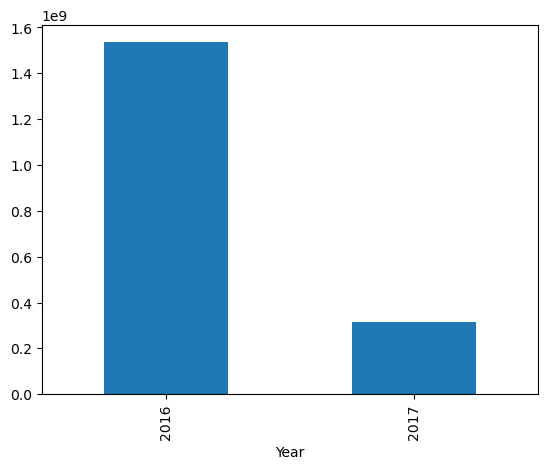

In [ ]:
df_query.groupby('Year').Total.sum().plot(kind='bar')

Hay valores de Total en nulo, los llenamos con cero para graficar las líneas de ventas por año.

In [ ]:
pvt = pd.pivot_table(df_query, columns='Year', index=['Month'], aggfunc='sum', values='Total', fill_value=0)
pvt

Year,2016,2017
Month,,
1,"181,300,617.96","63,705,837.81"
2,"181,511,205.84","55,461,048.49"
3,"184,404,943.35","57,743,108.51"
4,"176,723,370.78","62,525,085.82"
5,0.00,"65,192,518.20"
6,0.00,"11,056,937.09"
7,"188,232,809.44",0.00
8,"185,686,773.38",0.00
10,"27,774,505.33",0.00


<AxesSubplot:xlabel='Month'>

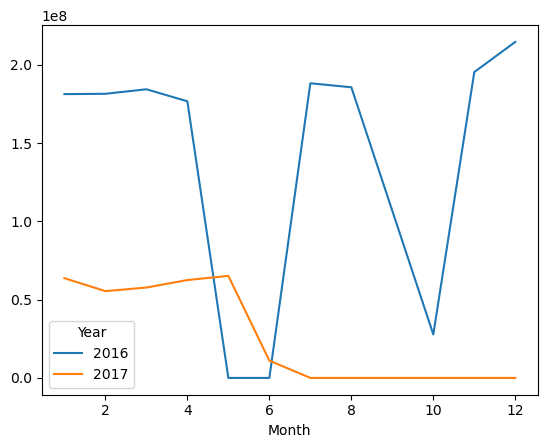

In [ ]:
pvt.plot(subplots=False, use_index=True)

Se evidencia que no hay datos para los meses Mayo y Junio de 2016, y el segundo semestre de 2017.

In [ ]:
df_query = df_sales.query("Type == 'sellout' \
               and (Date >= '2016-05-01' and Date <= '2016-06-30')")
df_query.shape

(0, 20)

In [ ]:
df_query = df_sales.query("Type == 'sellout' \
               and (Date >= '2017-07-01' and Date <= '2017-12-31')")
df_query.shape

(0, 20)

**Query 6: Volumen de ventas a los distribuidores por año**

Agregamos una columna año para obtener el volumen de ventas Sellin en un año específico.

In [ ]:
df_query = df_sales.query("Type == 'sellin'")
df_query['Year'] = df_query['Date'].dt.year
df_query['Month'] = df_query['Date'].dt.month

df_query.groupby('Year')['Total'].sum().sort_values(ascending=False)

Year
2016   2,927,928,579.37
2015   2,657,728,363.65
2017   1,268,821,746.07
Name: Total, dtype: float64

Y agrupada por proveedor

In [ ]:
df_query.groupby(['Year','Provider'])['Total'].sum().sort_values(ascending=False)

Year  Provider   
2016  proveedor_2   2,273,373,311.42
2015  proveedor_2   2,093,581,182.50
2017  proveedor_2     980,999,407.43
2016  proveedor_1     653,723,945.76
2015  proveedor_1     564,147,181.15
2017  proveedor_1     283,573,502.43
Name: Total, dtype: float64

<AxesSubplot:xlabel='Year'>

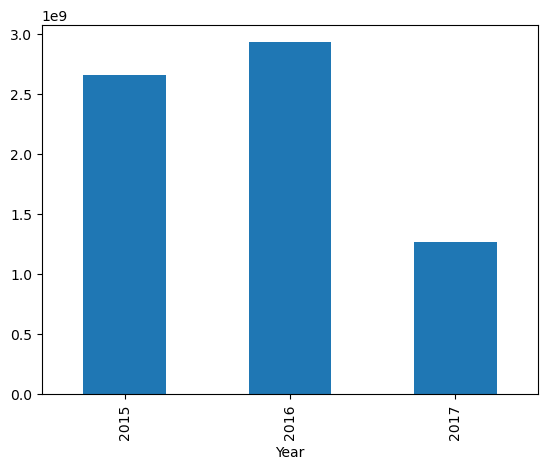

In [ ]:
df_query.groupby('Year').Total.sum().plot(kind='bar')

<AxesSubplot:xlabel='Year,Provider'>

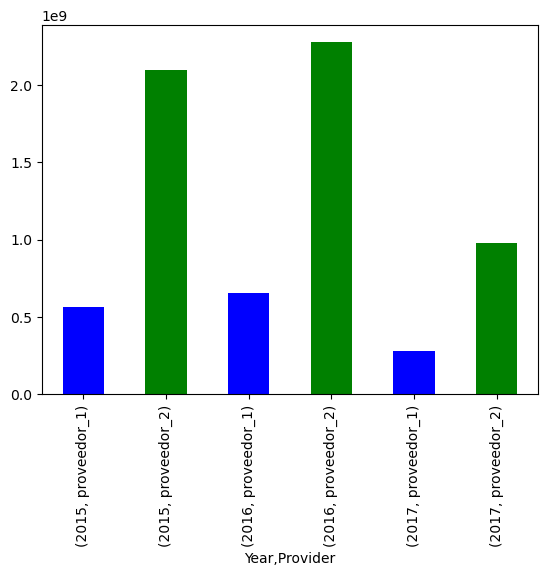

In [ ]:
df_query.groupby(['Year','Provider']).Total.sum().plot(kind='bar', color=['b', 'g'])

In [ ]:
pvt = pd.pivot_table(df_query, columns='Year', index=['Month'], aggfunc='sum', values='Total', fill_value=0)
pvt

Year,2015,2016,2017
Month,,,
1,"193,824,376.47","212,220,866.66","187,627,702.40"
2,"200,675,411.02","219,645,945.90","176,280,007.46"
3,"229,227,753.81","225,432,972.45","200,456,603.58"
4,"239,515,471.33","245,717,213.75","199,916,102.35"
5,"222,962,727.16","266,513,978.47","200,123,630.72"
6,"222,485,622.44","245,503,105.91","52,390,244.38"
7,"235,947,296.22","244,412,036.63","44,837,564.35"
8,"222,442,720.81","263,798,878.40","40,607,749.05"
9,"215,508,279.06","256,955,522.53","41,317,984.03"


<AxesSubplot:xlabel='Month'>

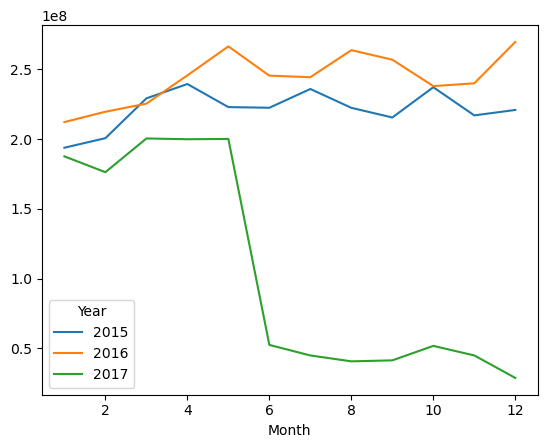

In [ ]:
pvt.plot(subplots=False, use_index=True)

**Query 7: Productos que no registran ventas**

Del catálogo completo de productos, identificar para qué productos no se registran ventas.

In [ ]:
df_query = df_sales.query("Type.isnull() and not Sku.isnull()", engine='python')
categories = set(df_query['Sku_Category'].tolist())

print("Número de productos sin ventas: " + str(df_query['Sku'].count()))
print("Categorías de productos sin ventas: " + str(categories))

Número de productos sin ventas: 1195
Categorías de productos sin ventas: {'Sugar-free', 'Super-flavour'}


**Query 8: Tiendas que no registran ventas**

Del catálogo completo de tiendas, identificar para qué tiendas no se registran ventas.

In [ ]:
df_query = df_sales.query("Type.isnull() and not Store_Id.isnull()", engine='python')
stores = set(df_query['Store_Name'].tolist())

print("Número de tiendas sin ventas: " + str(df_query['Store_Id'].count()))
print("Lista de tiendas sin ventas: " + str(stores))

Número de tiendas sin ventas: 119
Lista de tiendas sin ventas: {'Interesting Black Butcher', 'Interesting Black AllInOne', 'Dead Purple Butcher', 'Clean Turquoise Grocery', 'Old Turquoise HighShop', 'Long Azure Baker', 'Old Violet Fishmonger', 'Funny Turquoise HairDresser', 'Young Black Laundrette', 'Great Fuchsia SmallShop', ' Khaki SuperMarket', 'Young Navy Center', 'Clean Sea Green Mall', 'Young Coral SmallShop', 'Tiny Orchid Laundrette', 'Horrible Magenta Stationer', 'Bloody Lavender SmallShop', 'Short Lemon Shop', 'Alive Sky Blue Market', 'Dead Fuchsia Stationer', 'Short Indigo Cafe', 'Impressive White Butcher', 'Long Golden SmallShop', 'Alive Chocolate HighShop', 'Defiant Grey Laundrette', 'Awesome Beige Mall', 'Evil Khaki Fishmonger', 'Empty Burgundy Stationer', 'Old Burgundy Cafe', 'Young Crimson Tobacconist', 'Awful Crimson Mall', 'Bizarre Aqua GreatShop', 'Dead Red Fishmonger', 'Enlightened Blue SuperMarket', 'Alive Brown Grocery', 'Alive Burgundy Tobacconist', 'Alive Sky Blu

**Query 9: Margen de ventas Sellin**

Productos con margen de ventas más alto y más bajo.

Primero exploramos los valores de margen de ventas Sellin.

In [ ]:
df_query = df_sales.query("Type == 'sellin'")

min_value = df_query['Margin'].min()
max_value = df_query['Margin'].max()
avg_value = df_query['Margin'].mean()
print(min_value)
print(max_value)
print("{:,.2f}".format(avg_value))

5.4
39.15
16.12


In [ ]:
df_query.groupby('Sku')['Margin'].max().sort_values(ascending=False)

Sku
4,749,421.00   39.15
4,739,414.00   38.22
4,697,052.00   36.80
4,665,676.00   35.99
4,789,544.00   35.56
4,779,537.00   35.09
4,655,669.00   34.34
4,769,520.00   33.39
4,543,948.00   31.90
4,533,931.00   31.37
4,523,924.00   29.84
4,625,287.00   27.14
4,829,827.00   16.02
4,819,810.00   16.02
4,809,797.00   14.37
4,432,194.00   14.36
4,422,187.00   14.18
4,381,425.00   11.66
4,554,143.00   11.66
4,250,046.00   11.55
4,240,039.00   11.55
4,615,034.00   11.53
4,361,050.00   11.28
4,330,800.00   11.22
4,351,043.00   11.15
4,220,015.00   10.86
4,230,022.00   10.85
4,729,193.00   10.80
4,574,433.00   10.51
4,260,053.00    9.91
4,675,706.00    9.87
4,719,179.00    8.47
4,709,131.00    7.09
4,442,378.00    6.99
Name: Margin, dtype: float64

In [ ]:
df_query.groupby('Sku')['Margin'].max().sort_values(ascending=True)

Sku
4,442,378.00    6.99
4,709,131.00    7.09
4,719,179.00    8.47
4,675,706.00    9.87
4,260,053.00    9.91
4,574,433.00   10.51
4,729,193.00   10.80
4,230,022.00   10.85
4,220,015.00   10.86
4,351,043.00   11.15
4,330,800.00   11.22
4,361,050.00   11.28
4,615,034.00   11.53
4,240,039.00   11.55
4,250,046.00   11.55
4,381,425.00   11.66
4,554,143.00   11.66
4,422,187.00   14.18
4,432,194.00   14.36
4,809,797.00   14.37
4,819,810.00   16.02
4,829,827.00   16.02
4,625,287.00   27.14
4,523,924.00   29.84
4,533,931.00   31.37
4,543,948.00   31.90
4,769,520.00   33.39
4,655,669.00   34.34
4,779,537.00   35.09
4,789,544.00   35.56
4,665,676.00   35.99
4,697,052.00   36.80
4,739,414.00   38.22
4,749,421.00   39.15
Name: Margin, dtype: float64

El producto 4749421 tiene el margen de ventas Sellin más alto con 39.15

El producto 4442378 tiene el margen de ventas Sellin más bajo con 6.99 
